## Niclas TOP SECRET KEEP OUT

In [1]:
import pandas as pd
import os
import shutil
from matplotlib import pyplot as plt
from ultralytics import YOLO
import random
import cv2
import pandas as pd
import numpy as np

In [ ]:
# dataset_path = "./dataset/SB-FishDisease/"

# data = []

# for root, dirs, files in os.walk(dataset_path):
#     for file in files:
#         image_path = os.path.join(root, file)
        
#         image_name = os.path.splitext(file)[0]
        
#         if image_name.lower().startswith("healthy"):
#             target='healthy'
#         else:
#             target = 'disease'
#         category = image_name.split('_')[:-1]
#         category = '_'.join(category)
        
#         data.append({"path": image_path, "sickness": category.lower(), 'target':target})

# df = pd.DataFrame(data)

# df.to_csv("./dataset/SB-FishDisease.csv", index=False)


In [2]:
df = pd.read_csv("./dataset/SB-FishDisease.csv")

In [3]:
df['sickness'].value_counts()

sickness
healthy_fish                         141
bacterial_gill disease                54
bacterial_diseases _aeromoniasis      47
fungal_diseases_saprolegniasis        46
bacterial_red disease                 45
viral_diseases_white_tail_disease     41
parasitic_diseases                    35
healthy_gills                         14
Name: count, dtype: int64

In [4]:
df['target'].value_counts()

target
disease    268
healthy    155
Name: count, dtype: int64

In [19]:
# Ange sökvägen till din huvudmapp
main_folder = "./dataset/YOLO"

# Ange sökvägen till den nya mappen där alla filer ska kopieras
new_folder = "./dataset/YOLOstacked"

# Skapa mapparna "images" och "labels" i den nya mappen
images_folder = os.path.join(new_folder, "images")
labels_folder = os.path.join(new_folder, "labels")

os.makedirs(images_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Loopa igenom varje undermapp i huvudmappen
for folder_name in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder_name)

    # # Kontrollera om "healthy" inte finns i undermappens namn
    # if "healthy" not in folder_name.lower():
    # Loopa igenom varje fil i undermappen och kopiera den till rätt mapp i den nya mappen
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Ersätt mellanslag med understreck i filnamnet
        new_file_name = file_name.replace(" ", "")

        # Skapa sökvägen för den nya filen baserat på filtyp
        if new_file_name.lower().endswith('.txt'):
            destination_path = os.path.join(labels_folder, new_file_name)
        else:
            destination_path = os.path.join(images_folder, new_file_name)

        # Kopiera filen till rätt mapp i den nya mappen
        shutil.copy2(file_path, destination_path)

        print(f"{file_name} har kopierats till {destination_path}")


Bacterial_diseases _Aeromoniasis _01.jpeg har kopierats till ./dataset/YOLOstacked\images\Bacterial_diseases_Aeromoniasis_01.jpeg
Bacterial_diseases _Aeromoniasis _01.txt har kopierats till ./dataset/YOLOstacked\labels\Bacterial_diseases_Aeromoniasis_01.txt
Bacterial_diseases _Aeromoniasis _02.jpg har kopierats till ./dataset/YOLOstacked\images\Bacterial_diseases_Aeromoniasis_02.jpg
Bacterial_diseases _Aeromoniasis _02.txt har kopierats till ./dataset/YOLOstacked\labels\Bacterial_diseases_Aeromoniasis_02.txt
Bacterial_diseases _Aeromoniasis _03.png har kopierats till ./dataset/YOLOstacked\images\Bacterial_diseases_Aeromoniasis_03.png
Bacterial_diseases _Aeromoniasis _03.txt har kopierats till ./dataset/YOLOstacked\labels\Bacterial_diseases_Aeromoniasis_03.txt
Bacterial_diseases _Aeromoniasis _05.jpg har kopierats till ./dataset/YOLOstacked\images\Bacterial_diseases_Aeromoniasis_05.jpg
Bacterial_diseases _Aeromoniasis _05.txt har kopierats till ./dataset/YOLOstacked\labels\Bacterial_dis

In [272]:
model = YOLO('yolov8m.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [273]:
results = model.train(data="./dataset/sick_fishes.v1i.yolov8/data.yaml", epochs=10)

Ultralytics YOLOv8.0.227 🚀 Python-3.10.11 torch-2.1.1+cpu CPU (AMD Ryzen 5 7600 6-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8m.yaml, data=./dataset/sick_fishes.v1i.yolov8/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

train: Scanning C:\Kodprojekt\sick_fishes\dataset\sick_fishes.v1i.yolov8\train\labels.cache... 102 images, 3 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]
val: Scanning C:\Kodprojekt\sick_fishes\dataset\sick_fishes.v1i.yolov8\valid\labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

Plotting labels to c:\Kodprojekt\sick_fishes\runs\detect\train8\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to c:\Kodprojekt\sick_fishes\runs\detect\train8
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.419      4.605       4.21         10        640: 100%|██████████| 7/7 [01:18<00:00, 11.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]

                   all         29         55   0.000575     0.0909   0.000326   5.74e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.306       4.36      4.213         11        640: 100%|██████████| 7/7 [01:18<00:00, 11.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]

                   all         29         55    0.00046     0.0727   0.000292   5.43e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.436      4.253      4.181         24        640: 100%|██████████| 7/7 [01:18<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]

                   all         29         55   0.000575     0.0909   0.000348   6.03e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.365      4.116      4.109         12        640: 100%|██████████| 7/7 [01:17<00:00, 11.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]

                   all         29         55   0.000575     0.0909   0.000356   6.12e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.473      4.104      4.067         18        640: 100%|██████████| 7/7 [01:17<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]

                   all         29         55   0.000575     0.0909   0.000361   6.24e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.291      3.973      3.917         12        640: 100%|██████████| 7/7 [01:17<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]

                   all         29         55   0.000575     0.0909   0.000332   5.75e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G        3.2      3.918      3.828          9        640: 100%|██████████| 7/7 [01:17<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.85s/it]

                   all         29         55   0.000575     0.0909   0.000328    5.7e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.312      3.914      3.773         12        640: 100%|██████████| 7/7 [01:17<00:00, 11.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.95s/it]

                   all         29         55   0.000345     0.0545   0.000293   3.51e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.107      3.741      3.671         13        640: 100%|██████████| 7/7 [01:17<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]

                   all         29         55   0.000345     0.0545   0.000184   1.84e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      3.202      3.735      3.603          7        640: 100%|██████████| 7/7 [01:17<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.76s/it]

                   all         29         55   0.000805      0.127   0.000469    9.6e-05



10 epochs completed in 0.243 hours.
Optimizer stripped from c:\Kodprojekt\sick_fishes\runs\detect\train8\weights\last.pt, 52.0MB
Optimizer stripped from c:\Kodprojekt\sick_fishes\runs\detect\train8\weights\best.pt, 52.0MB

Validating c:\Kodprojekt\sick_fishes\runs\detect\train8\weights\best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.11 torch-2.1.1+cpu CPU (AMD Ryzen 5 7600 6-Core Processor)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.88s/it]


                   all         29         55   0.000805      0.127   0.000469    9.6e-05
Speed: 1.0ms preprocess, 263.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to c:\Kodprojekt\sick_fishes\runs\detect\train8


In [274]:
reloaded_model = YOLO('./runs/detect/train7232/weights/best.pt')

In [275]:
from skimage import io,transform

In [276]:
def prepare_image(file_path, target_size=(64, 64)):
    img = io.imread(file_path)
    img_resized = transform.resize(img, target_size)
    img_flat = img_resized.flatten()
    return img_flat

In [277]:
def random_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print("Inga bilder hittades i mappen.")
        return None

    random_image = random.choice(image_files)

    img_path = os.path.join(folder_path, random_image)

    return img_path

In [316]:
def sickness_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    img = cv2.resize(img, (640, 640))

    # Pass the image through the detection model and get the result
    detect_result = reloaded_model(img, conf=0.015)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

In [323]:
folder_path = './dataset/sick_fishes.v1i.yolov8/test/images/'
img_path = random_image(folder_path)
detected_img = sickness_detect(img_path)


0: 640x640 (no detections), 48.0ms
Speed: 1.0ms preprocess, 48.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


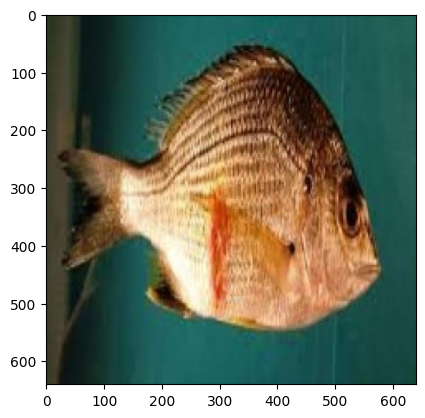

In [324]:
plt.imshow(detected_img)
plt.show()